In [1]:
from google.colab import files

fp = files.upload()

Saving naver.csv to naver.csv


In [2]:
import pandas as pd

df = pd.read_csv('naver.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-10-29,1797.724854,1797.724854,1797.724854,1797.724854,1763.381104,501745.0
1,2002-10-30,2012.226074,2012.226074,1989.754517,2012.226074,1973.784546,20892185.0
2,2002-10-31,2042.869141,2091.897949,1865.139526,1912.125488,1875.595947,32327083.0
3,2002-11-01,1961.154419,2022.440430,1724.181519,1793.639038,1759.373291,18373668.0
4,2002-11-04,1777.296143,1789.553345,1660.852539,1703.752808,1671.204102,16939411.0


In [3]:
df['3MA'] = df['Adj Close'].rolling(window=3).mean()
df['5MA'] = df['Adj Close'].rolling(window=5).mean()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
0,2002-10-29,1797.724854,1797.724854,1797.724854,1797.724854,1763.381104,501745.0,NaN,NaN
1,2002-10-30,2012.226074,2012.226074,1989.754517,2012.226074,1973.784546,20892185.0,NaN,NaN
2,2002-10-31,2042.869141,2091.897949,1865.139526,1912.125488,1875.595947,32327083.0,1870.920532,NaN
3,2002-11-01,1961.154419,2022.440430,1724.181519,1793.639038,1759.373291,18373668.0,1869.584595,NaN
4,2002-11-04,1777.296143,1789.553345,1660.852539,1703.752808,1671.204102,16939411.0,1768.724447,1808.667798


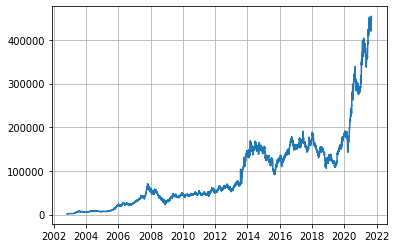

In [8]:
import matplotlib.pyplot as plt

df_final = df[['Adj Close']]
df_final.index = pd.DatetimeIndex(df['Date'])
plt.plot(df_final)
plt.grid()
plt.show()

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
count,4710.000000,4710.000000,4710.000000,4710.000000,4710.000000,4.710000e+03,0.0,4682.000000
mean,94367.364519,95760.482063,92922.220084,94321.375034,93541.926754,1.540130e+06,NaN,93241.684647
std,88272.839026,89458.117498,87034.265607,88218.982593,88150.849356,2.662032e+06,NaN,87913.712925
min,1532.151855,1568.923462,1450.437134,1495.380249,1466.812500,0.000000e+00,NaN,1509.694678
25%,31868.757813,32389.689942,31023.010742,31868.757813,31259.933594,4.970698e+05,NaN,31032.700684
50%,58528.201172,59815.207031,57486.335938,58650.773438,57675.220704,8.053620e+05,NaN,57350.100000
75%,146600.000000,149000.000000,145200.000000,146800.000000,145435.187500,1.395398e+06,NaN,145072.632812
max,460000.000000,465000.000000,452000.000000,454000.000000,454000.000000,3.621377e+07,NaN,447700.000000


In [ ]:
df.isnull().sum()

Date          0
Open          6
High          6
Low           6
Close         6
Adj Close     6
Volume        6
3MA          20
5MA          34
dtype: int64

In [ ]:
df.loc[df['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume,3MA,5MA
569,2005-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3778,2017-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3783,2017-11-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4020,2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4265,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import numpy as np
df['Volume'] = df['Volume'].replace(0, np.nan)
for i in df.columns:
  missing = df.loc[df[i]==0].shape[0]
  print(i + ':' + str(missing))

Date:0
Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:0
3MA:0
5MA:0


In [ ]:
df.isnull().sum()

Date          0
Open          6
High          6
Low           6
Close         6
Adj Close     6
Volume       87
3MA          20
5MA          34
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
3MA          0
5MA          0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df[df.columns[1:]])
scaler_df = pd.DataFrame(scaler_df, columns=df.columns[1:])
print(scaler_df)

          Open      High       Low  ...    Volume       3MA       5MA
0     0.000535  0.000476  0.000467  ...  0.466239  0.000609  0.000670
1     0.000356  0.000467  0.000544  ...  0.422318  0.000457  0.000628
2     0.000428  0.000370  0.000390  ...  0.342948  0.000363  0.000475
3     0.000267  0.000384  0.000444  ...  0.320649  0.000337  0.000367
4     0.000209  0.000176  0.000340  ...  0.183803  0.000288  0.000297
...        ...       ...       ...  ...       ...       ...       ...
4596  0.960739  0.964396  0.965598  ...  0.015280  0.967444  0.962796
4597  0.968373  0.964396  0.972256  ...  0.009089  0.978173  0.971313
4598  0.961829  0.973027  0.975585  ...  0.015034  0.988161  0.985880
4599  0.983641  0.977343  0.985573  ...  0.007350  0.994821  0.997535
4600  0.979279  0.974106  0.982244  ...  0.007005  0.996300  1.000000

[4601 rows x 8 columns]


In [ ]:
featr = ['3MA', '5MA', 'Adj Close']
label = ['Adj Close']

label_df = pd.DataFrame(scaler_df, columns=label)
featr_df = pd.DataFrame(scaler_df, columns=featr)

print(label_df)
print(featr_df)

label_np = label_df.to_numpy()
featr_np = featr_df.to_numpy()

      Adj Close
0      0.000452
1      0.000447
2      0.000368
3      0.000372
4      0.000301
...         ...
4596   0.980112
4597   0.974587
4598   0.996685
4599   1.000000
4600   0.979007

[4601 rows x 1 columns]
           3MA       5MA  Adj Close
0     0.000609  0.000670   0.000452
1     0.000457  0.000628   0.000447
2     0.000363  0.000475   0.000368
3     0.000337  0.000367   0.000372
4     0.000288  0.000297   0.000301
...        ...       ...        ...
4596  0.967444  0.962796   0.980112
4597  0.978173  0.971313   0.974587
4598  0.988161  0.985880   0.996685
4599  0.994821  0.997535   1.000000
4600  0.996300  1.000000   0.979007

[4601 rows x 3 columns]


In [ ]:
def make_sequene_dataset(featr_data, label_data, window_size):
  
  featr_list = []
  label_list = []

  for i in range(len(featr_data) - window_size):
    featr_list.append(featr_data[i:i+window_size])
    label_list.append(label_data[i+window_size])

  return np.array(featr_list), np.array(label_list)

window_size = 40

x, y = make_sequene_dataset(featr_np, label_np, window_size)

print(x.shape, y.shape)

(4561, 40, 3) (4561, 1)


In [ ]:
split = -200

x_train = x[:split]
y_train = y[:split]

x_test = x[split:]
y_test = y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4361, 40, 3) (4361, 1)
(200, 40, 3) (200, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67584     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, 
          batch_size=16, callbacks=[early_stop])

Epoch 1/100
273/273 [==============================] - 13s 37ms/step - loss: 6.3512e-04 - mae: 0.0104 - val_loss: 7.3083e-04 - val_mae: 0.0213
Epoch 2/100
273/273 [==============================] - 9s 34ms/step - loss: 9.4390e-05 - mae: 0.0062 - val_loss: 7.3386e-04 - val_mae: 0.0218
Epoch 3/100
273/273 [==============================] - 10s 36ms/step - loss: 9.0133e-05 - mae: 0.0062 - val_loss: 0.0010 - val_mae: 0.0246
Epoch 4/100
273/273 [==============================] - 10s 36ms/step - loss: 9.5724e-05 - mae: 0.0066 - val_loss: 5.5578e-04 - val_mae: 0.0189
Epoch 5/100
273/273 [==============================] - 10s 36ms/step - loss: 8.4144e-05 - mae: 0.0060 - val_loss: 5.9079e-04 - val_mae: 0.0184
Epoch 6/100
273/273 [==============================] - 10s 36ms/step - loss: 7.2998e-05 - mae: 0.0056 - val_loss: 4.8179e-04 - val_mae: 0.0167
Epoch 7/100
273/273 [==============================] - 10s 36ms/step - loss: 7.2368e-05 - mae: 0.0056 - val_loss: 4.6549e-04 - val_mae: 0.0162
Epoc

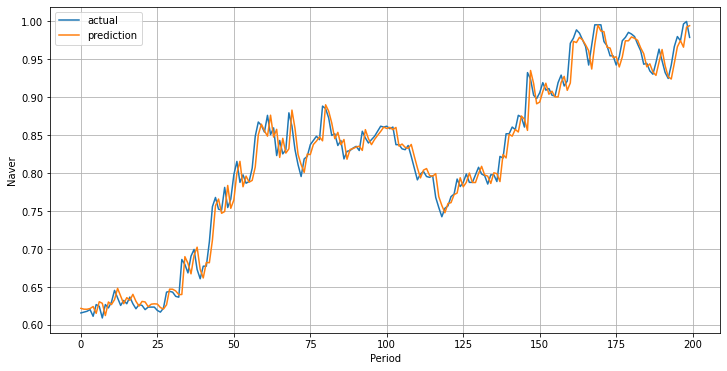

In [ ]:
import matplotlib.pyplot as plt

p = model.predict(x_test)

plt.figure(figsize=(12,6))
plt.ylabel('Naver')
plt.xlabel('Period')
plt.plot(y_test, label='actual')
plt.plot(p, label='prediction')
plt.legend()
plt.grid()
plt.show()